In [62]:
#Import Libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
from csv import writer

In [63]:
#Specify Target & Parsing
url = 'https://musicbrainz.org/series/6a4b53b9-2756-4afe-93f2-306039d41910'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

In [64]:
#Specify Table
album_table = soup.find('table', class_='tbl release-group-list')

In [65]:
#Specify dataframe, assign column names
for album in album_table.find_all('tbody'):
    rows = album.find_all('tr')
    for row in rows:
        album_index = row.find('td', class_='number-column').text
        album_year = row.find('td', class_='c').text
        album_title = row.find('bdi').text
        album_artist = row.find_all('bdi')[1].text
        album_rating = row.find('span', class_='inline-rating').text
                
    #Create Dictionary
        albums = {
            'Ranking': album_index,
            'Year': album_year, 
            'Title': album_title,
            'Artist': album_artist,
            'Rating': album_rating
        }
        albumlist.append(albums)

In [66]:
#Export to PDF
df = pd.DataFrame(albumlist)
df.to_csv('RS100.csv', encoding='utf-8', index=False)

#### Verify Results

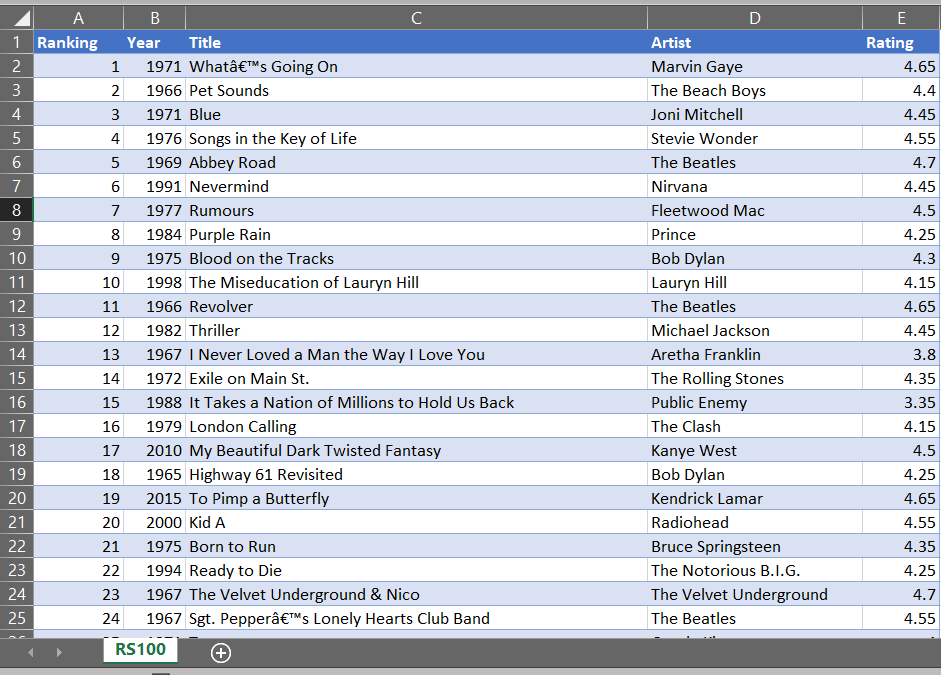